# 泰坦尼克号数据的探索分析
该数据集包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。这个数据集就是来自 Kaggle，你也可以在 Kaggle 网站上查看这个数据集的详细描述。

---

## 一、数据的加载与数据描述

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: TkAgg


In [2]:
titanic = pd.read_csv('titanic-data.csv')
print('titanic data size:', titanic.shape)
titanic.head()

titanic data size: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
**1. 数据字典**

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| PassengerId | Id of Passengers                                   |                                |
| Survived | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Name | Name of Passengers                                   |                                |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| Sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

**2. 变量说明**

**Pclass:** A proxy for socio-economic status (SES)

    1st = Upper
    2nd = Middle
    3rd = Lower


**Age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**Sibsp:** The dataset defines family relations in this way...
    
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

**Parch:** The dataset defines family relations in this way...
    
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

## 二、数据分析可能解决的问题

    1. 幸存和不幸者的数量情况
    2. 幸存者的年龄分布，性别分布
    3. 泰坦尼克号上不同年龄的乘客的数量情况
    4. 幸存者数量与客舱号（Cabin number）是否存在关系？
    5. 泰坦尼克号上乘客登船港口情况， 每个港口的幸存者数量
    6. 泰坦尼克号上的兄弟/配偶数量情况，父母/孩子数量情况

---
## 三、探索分析

**3.1 了解数据情况及数据清洗**

In [3]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# 填充缺失值
titanic.fillna(method='ffill', inplace=True)

---
**3.2  幸存和不幸者的数量情况**

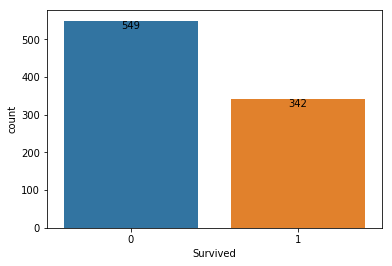

In [4]:
sns.countplot(data=titanic, x = 'Survived')
X = np.arange(2)
Y = titanic.groupby(['Survived'])['PassengerId'].count()
for x, y in zip(X, Y):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y + 0.1, '%.0f' % y, ha='center', va='top')

(-1.113757540143789,
 1.1211356887777435,
 -1.110527929435086,
 1.1005013696949746)

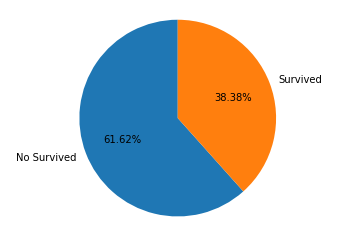

In [5]:
labels = 'No Survived', 'Survived'
fig1, ax1 = plt.subplots()
plt.pie(Y,labels=labels, autopct='%1.2f%%', startangle=90)
ax1.axis('equal')

分析：由上图可知，342人获救，约占乘客的38.38%， 超过一半的人未获救。

---
**3.3 幸存者的年龄分布，性别分布**

c:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


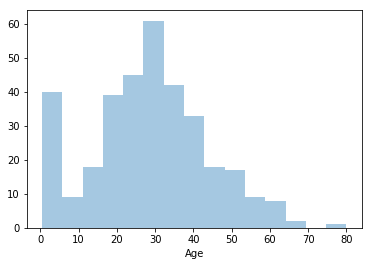

In [6]:
# 幸存者年龄分布
titanic_survived = titanic[titanic['Survived']==1]
bins = np.arange(0, titanic_survived['Age'].max()+5, 5)
sns.distplot(titanic_survived['Age'], kde=False)

c:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


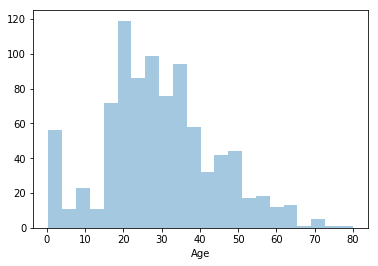

In [7]:
# 泰坦尼克号上的乘客年龄分布
bins = np.arange(0, titanic['Age'].max()+2, 2)
sns.distplot(titanic['Age'], kde=False)

分析：

&emsp;&emsp;在幸存者中，30岁左右的人最多。整个泰坦尼克号上，20岁左右的人最多。说明30岁左右的人幸存的概率比20岁的高。但这一结论可能并不准确，因为数据的年龄列存在较多的空值，空值的处理方法会严重影响到该结论。

---
幸存者中男女比例

(-1.106324041274519,
 1.1099133246241948,
 -1.110477771437977,
 1.1004989744035067)

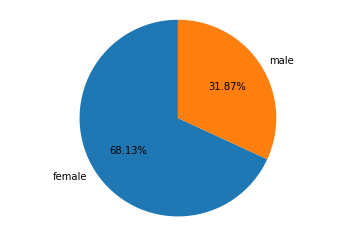

In [8]:
Y = titanic_survived.groupby(['Sex'])['PassengerId'].count()
# print(Y)
fig1, ax1 = plt.subplots()
plt.pie(Y, labels=Y.index, autopct='%1.2f%%', startangle=90)
ax1.axis('equal')

泰坦尼卡号上的男女比例

(-1.1135982498635462,
 1.1076137811100177,
 -1.1118283350684617,
 1.1005632874873577)

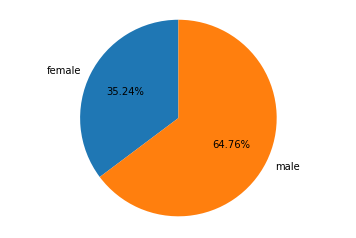

In [9]:
Y = titanic.groupby(['Sex'])['PassengerId'].count()
# print(Y)
fig1, ax1 = plt.subplots()
plt.pie(Y, labels=Y.index, autopct='%1.2f%%', startangle=90)
ax1.axis('equal')

分析：

&emsp;&emsp;由以上两图可知，在幸存者中女性占大多数，而整个泰坦尼克好上的男性占大多数，这说明女性幸存的比例比男性高。

---
**3.4 幸存者数量与客舱号（Cabin number）是否存在关系？**

In [10]:
titanic['Cabin_1'] = titanic['Cabin'].str[0]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,C


In [11]:
titanic_survived = titanic[titanic['Survived']==1]
titanic_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,E46,S,E
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,E46,C,E


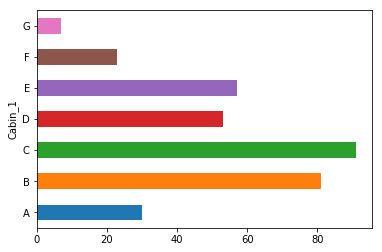

In [12]:
num_surv_by_Cab = titanic_survived.groupby(['Cabin_1'])['PassengerId'].count()
num_surv_by_Cab.plot.barh()

分析：有图可知，B、C、D、E开头的客舱幸存者数量相对于其他客舱的幸存者较多，这可能和船舱撞击冰山的部位有关。这个结论也可能不够准确，应为Cabin字段存在较多的空值，空值的填充方法对结论的影响很大。

---
**3.5 泰坦尼克号上乘客登船港口情况， 每个港口的幸存者数量**

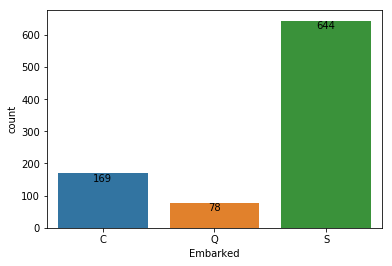

In [28]:
sns.countplot(data=titanic, x='Embarked', order=['C', 'Q', 'S'])
X = np.arange(3)
Y = titanic.groupby(['Embarked'])['PassengerId'].count()
for x, y in zip(X, Y):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y , '%.0f' % y, ha='center', va='top')

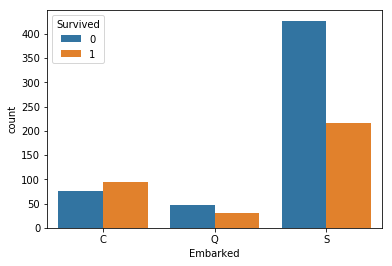

In [35]:
sns.countplot(data=titanic, x='Embarked', hue='Survived',order=['C', 'Q', 'S'])


分析：由以上bar图可知，泰坦尼克号上乘客绝大多数从英国Southampton登船，从Cherbourg港口登船的乘客幸存比例最大，其次是从Queenstown登船的。 

---
**3.6 泰坦尼克号上的兄弟/配偶数量情况，父母/孩子数量情况**

283


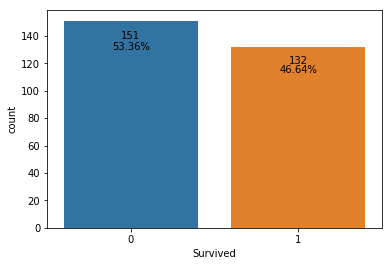

In [75]:
titanic_SibSp = titanic[titanic['SibSp'] != 0]
sns.countplot(data=titanic_SibSp, x='Survived')

num = titanic_SibSp.shape[0]
print(num)
X = np.arange(titanic_SibSp['Survived'].value_counts()[0])
Y = titanic_SibSp.groupby(['Survived'])['PassengerId'].count()
for x, y in zip(X, Y):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y*0.95 , '%.0f' % y, ha='center', va='top')
    plt.text(x, y*0.90 , '%.2f' % (100*float(y)/num)+"%", ha='center', va='top')

分析：兄弟姐妹/配偶一起登船的人中遇难151人，生还132人。生还人数为46.64%，相对于遇难者较低。

213


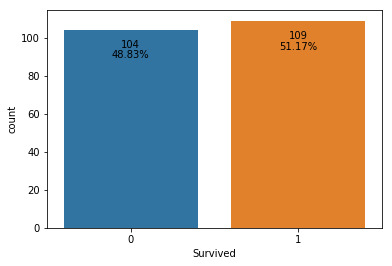

In [76]:
titanic_Parch = titanic[titanic['Parch'] != 0]
sns.countplot(data=titanic_Parch, x='Survived')

num = titanic_Parch.shape[0]
print(num)
X = np.arange(titanic_Parch['Survived'].value_counts()[0])
Y = titanic_Parch.groupby(['Survived'])['PassengerId'].count()
for x, y in zip(X, Y):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y*0.95 , '%.0f' % y, ha='center', va='top')
    plt.text(x, y*0.90 , '%.2f' % (100*float(y)/num)+"%", ha='center', va='top')

分析：父母/孩子一起登船的人中遇难104人，生还109人。生还人数为51.17%，相对于遇难者稍高。